# TTT4185 Machine learning for Speech technology

## Computer assigment 3b:  Regression analysis

Regression analysis is used to estimate/measure the relationship between an _independent_ variable, say $x$, and a _dependent_ variable, say $y$. One of the simplest regression problems is 
\begin{equation}
y = ax + b
\end{equation}
where $a$ and $b$ are constants. In practice our observations will be contaminated by noise, so we have
\begin{equation}
y = ax + b + n,
\end{equation}
where $n$ is noise, eg. measurement errors. This particular problem is called _linear regression_.

We will have a look at _non-linear regression_, using deep neural networks. Here we are looking at general regression problems in the form 
\begin{equation}
y = f(x) + n.
\end{equation}

We generate our data according to the function $f(x) = x^2 + \cos(20x) \text{ sign}(x)$, obtaining a set of observations $\{(x_i,y_i)\}$.

Then we assume we do not know the underlying function and we try to recover and approximation of $f$ only using the observations $\{(x_i,y_i)\}$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

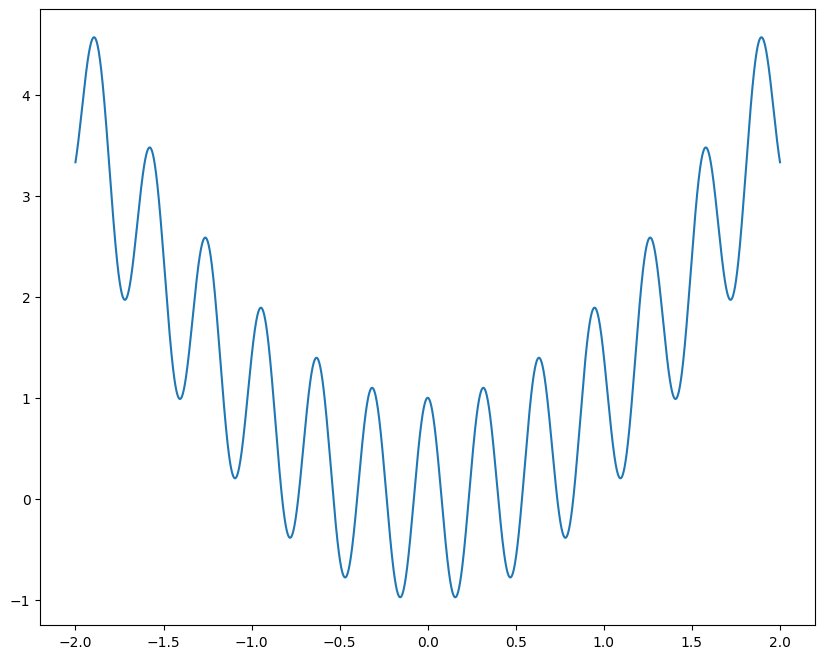

In [4]:
# Define function
def f(x):
    return x**2 + np.cos(20*x) # *np.sign(x)

# Setup some simulation parameters
# Number of observations
N = 5000

# Plot a "clean" version of the relationship between x and y
plt.figure(figsize=(10, 8))
x = np.linspace(-2,2,N)
plt.plot(x,f(x))
plt.show()

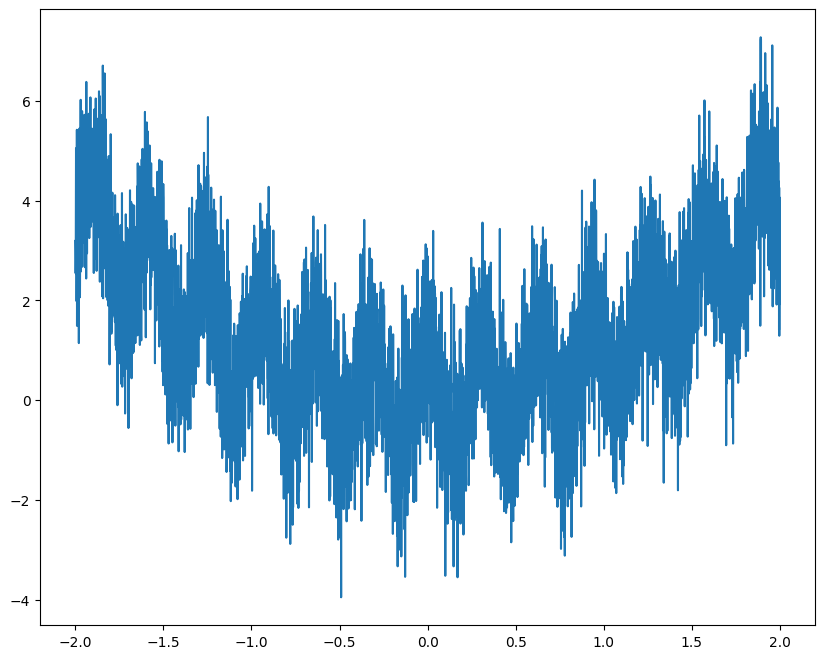

In [5]:
# Create a noise version of the observations
y = f(x) + np.random.randn(len(x))
plt.figure(figsize=(10, 8))
plt.plot(x,y)
plt.show()

One way to perform regression is to assume that the data is generated using a set of functions from a cerain family, for example polynomials of order $p$,
\begin{equation}
\hat f(x) = a_0 + a_1 x + a_2 x^2 \ldots a_p x^p.
\end{equation}
Then regression corresponds to fitting the parameters in the model. Let us see how this works out before using our neural networks.

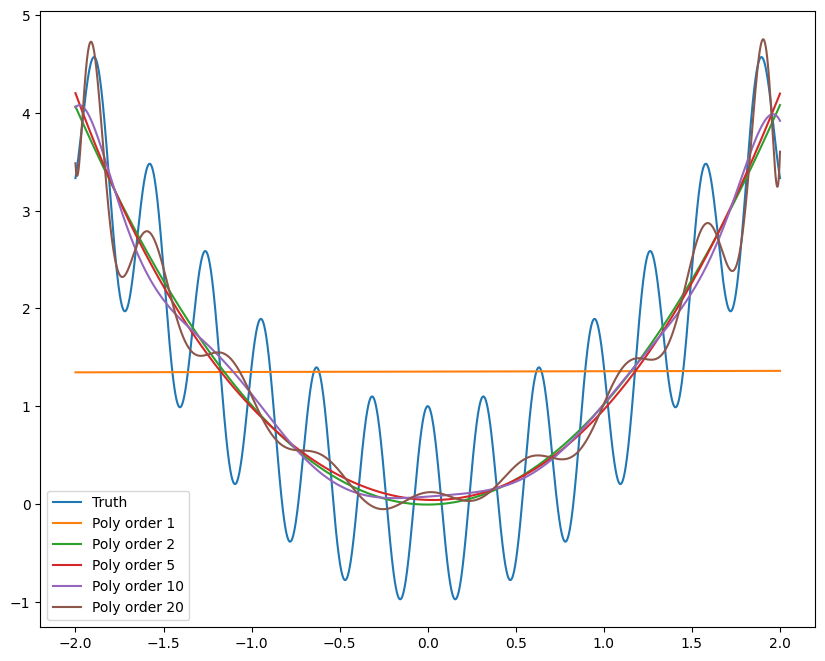

In [6]:
# Give a set of polynomial orders to try

P = [1, 2, 5, 10, 20]

# Define estimator function. Arguments are inout variable, observation and polynomial order
# Returns a set of polynomial coefficients
def reg_estimator(x,y,p):
    # Use simple ls approach
    N = len(x)
    H = np.zeros((N,p+1))
    for col in range(p+1):
        H[:,col] = x**col
    iHtH = np.linalg.inv(np.dot(H.T,H))
    theta = np.dot(np.dot(iHtH,H.T),y)
    return theta

# Computes fx) = c_0 + c_1x + c_2 x^2 ... c_p x^p
def poly(x, C):
    # compute p(x) for coeffs in c
    y = 0*x
    for p, c in enumerate(C):
        y += c*x**p        
    return y

plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
for p in P:
    C = reg_estimator(x,y,p)
    plt.plot(x,poly(x,C),label="Poly order " + str(p))
plt.legend()
plt.show()

## Problem 1
Play with different $p$ to see how close you can get to the true function.

Note: Very high $p$ will give numerical problems.

Theorically: f can be approached by a polynomial function as a sum of polynomial functions (if we take into consideration the serie development of cos, $cos(x) = \sum_{n=0}^{\infty} (-1)^{n}\frac{x^{2n}}{(2n)!}$) (without taking np.sign into consideration). So if we could calculate for very high $p$, our model would be close to f

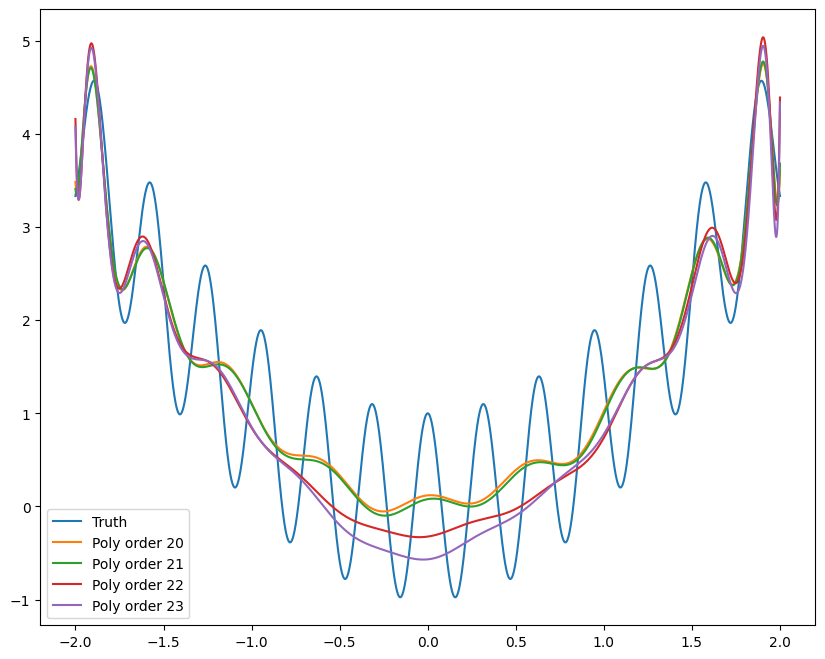

In [33]:
# Give a set of polynomial orders to try
P = [ k for k in range(20, 24)]

def reg_estimator(x,y,p):
    N = len(x)
    H = np.zeros((N,p+1))
    for col in range(p+1):
        H[:,col] = x**col
    iHtH = np.linalg.inv(np.dot(H.T,H))
    theta = np.dot(np.dot(iHtH,H.T),y)
    return theta

def poly(x, C):
    y = 0*x
    for p, c in enumerate(C):
        y += c*x**p        
    return y

plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
for p in P:
    C = reg_estimator(x,y,p)
    plt.plot(x,poly(x,C),label="Poly order " + str(p))
plt.legend()
plt.show()

Our best looks to be around 21 - 22. We can see that from 25 the calculus are too complicated. Also we could use gradient descent method to fit more the values of $f$.

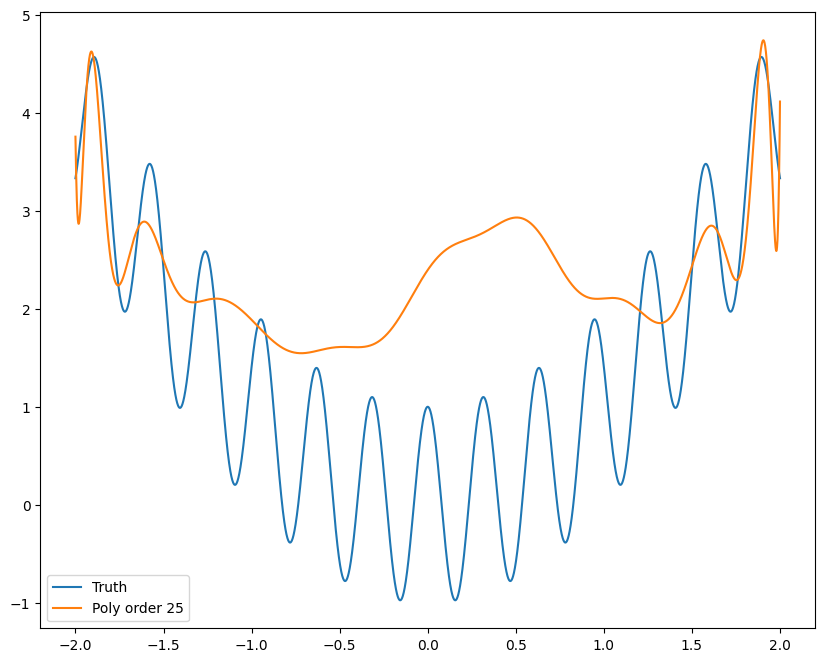

In [34]:
p = 25
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
C = reg_estimator(x,y,p)
plt.plot(x,poly(x,C),label="Poly order " + str(p))
plt.legend()
plt.show()

In what follows we will use a deep neural network to approximate $f$. We set this up below

In [11]:
# Ceate a model with a single hidden layer. Note that input and output has
# dimension one
M = 512
model = keras.Sequential([
    keras.layers.Dense(M, activation=tf.nn.relu, input_dim=1),
    keras.layers.Dense(1)
])

model.summary()
# Train the model
model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We train the network by using $x$ as an input and the squared error between the network output $\hat y$ and the observed value $y$ as a loss
\begin{equation}
 L = \frac{1}{N} \sum_n (\hat y - y)^2
\end{equation}

We first try our network on clean data to check if it works.

In [12]:
# train the model
history = model.fit(x, f(x), epochs=1000, batch_size=128, verbose=True)

Epoch 1/1000
40/40 [==============================] - 0s 548us/step - loss: 1.8325 - accuracy: 0.0000e+00
Epoch 2/1000
40/40 [==============================] - 0s 461us/step - loss: 0.8739 - accuracy: 0.0000e+00
Epoch 3/1000
40/40 [==============================] - 0s 494us/step - loss: 0.7341 - accuracy: 0.0000e+00
Epoch 4/1000
40/40 [==============================] - 0s 486us/step - loss: 0.6466 - accuracy: 0.0000e+00
Epoch 5/1000
40/40 [==============================] - 0s 491us/step - loss: 0.5931 - accuracy: 0.0000e+00
Epoch 6/1000
40/40 [==============================] - 0s 502us/step - loss: 0.5660 - accuracy: 0.0000e+00
Epoch 7/1000
40/40 [==============================] - 0s 483us/step - loss: 0.5473 - accuracy: 0.0000e+00
Epoch 8/1000
40/40 [==============================] - 0s 482us/step - loss: 0.5356 - accuracy: 0.0000e+00
Epoch 9/1000
40/40 [==============================] - 0s 479us/step - loss: 0.5256 - accuracy: 0.0000e+00
Epoch 10/1000
40/40 [=========================

Using the variable `history`, plot the evolution of the loss during training. 

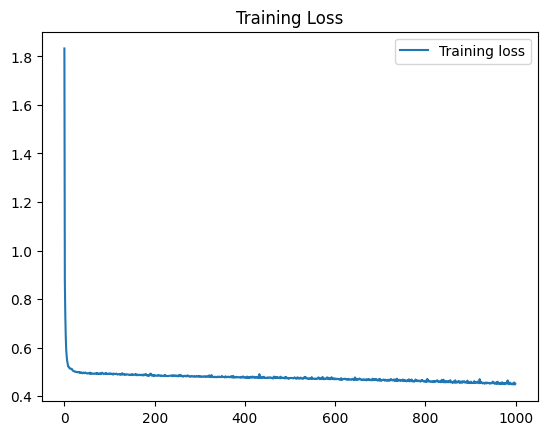

In [13]:
plt.plot(history.history['loss'], label='Training loss')
plt.title('Training Loss')
plt.legend()
plt.show()

157/157 [==============================] - 0s 284us/step


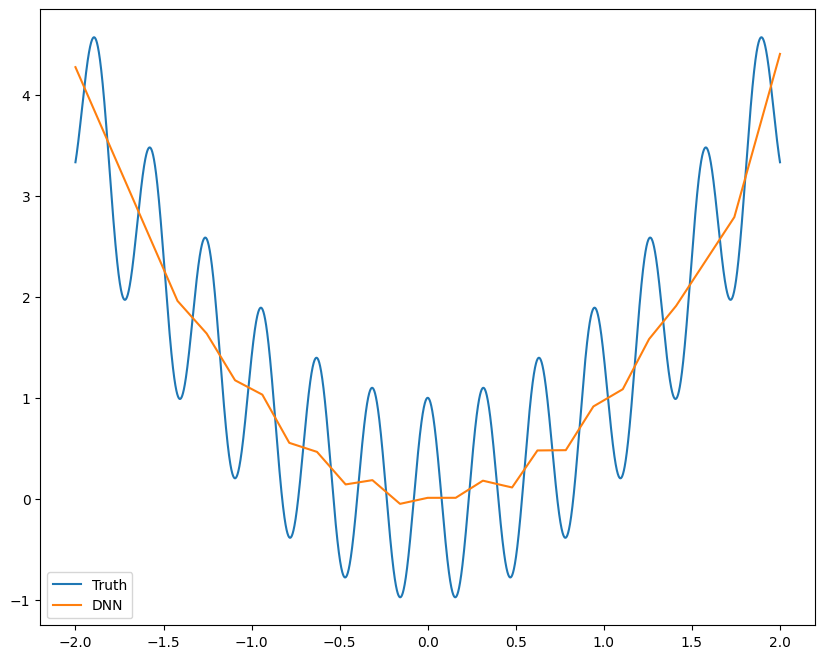

In [14]:
# Compute \hat y from the network and compare this to the true f(x)
z = model.predict(x)
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
plt.plot(x,z,label="DNN")
plt.legend()
plt.show()

## Problem 2
Try increasing the number of nodes in the network to see if the results can be improved.

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 8192)              16384     
                                                                 
 dense_48 (Dense)            (None, 1)                 8193      
                                                                 
Total params: 24577 (96.00 KB)
Trainable params: 24577 (96.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.2288 - accuracy: 0.0000e+00
Epoch 2/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.6010 - accuracy: 0.0000e+00
Epoch 3/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.0000e+00
Epoch 4/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5222 - accuracy: 0.0000e+0

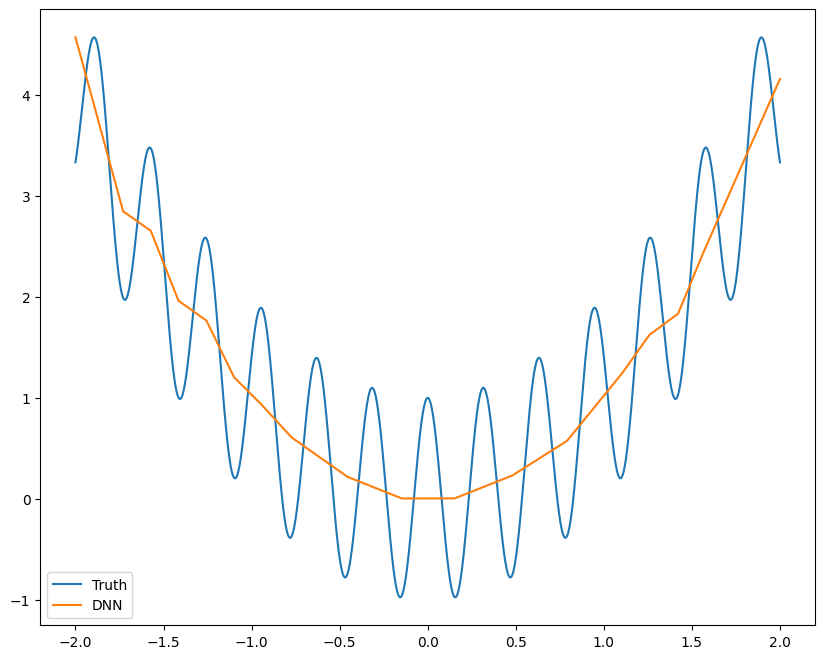

In [35]:
# Ceate a model with a single hidden layer. Note that input and output has
# dimension one
M = 512
model = keras.Sequential([
    keras.layers.Dense(16 * M, activation=tf.nn.relu, input_dim=1),
    keras.layers.Dense(1)
])

model.summary()
# Train the model
model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(x, f(x), epochs=1000, batch_size=128, verbose=True)

z = model.predict(x)
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
plt.plot(x,z,label="DNN")
plt.legend()
plt.show()

Increasing the number of nodes without adding layers doesn't seem very efficient. Indeed, each node are a bit independent.

Next we will use a deep network with more than one hidden layer.

In [16]:
# Create a model with multiple hidden layers. Note that input and output has
# dimension one
M = 16
model = keras.Sequential([
    keras.layers.Dense(M, activation=tf.nn.relu, input_dim=1),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(1)
])
model.summary()

# Train the model
model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(x, f(x), epochs=1000, batch_size=128, verbose=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                32        
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 865 (3.38 KB)
Trainable params: 865 (3.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
40/40 [====

157/157 [==============================] - 0s 275us/step


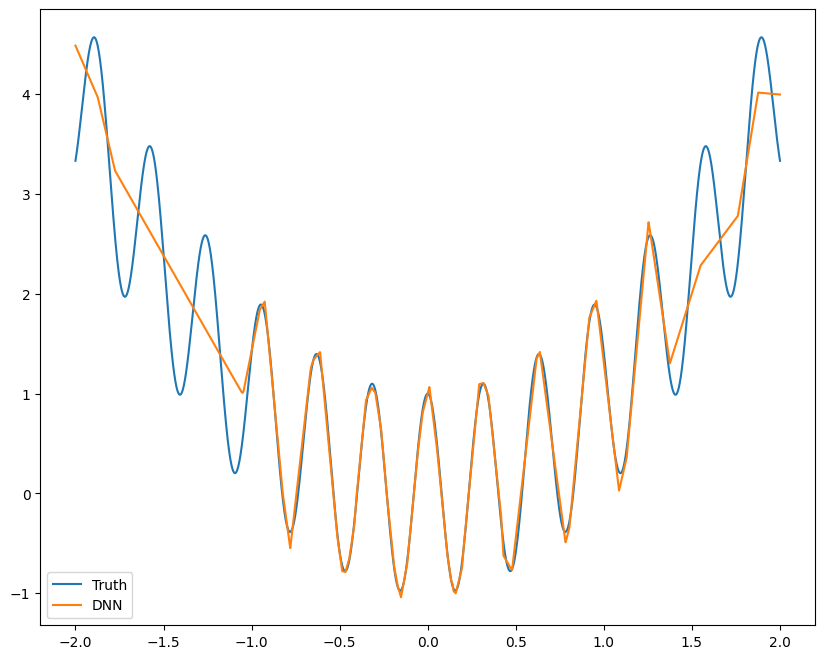

In [17]:
z = model.predict(x)
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
plt.plot(x,z,label="DNN")
plt.legend()
plt.show()

This is not bad in the range $[-1, 1.2]$

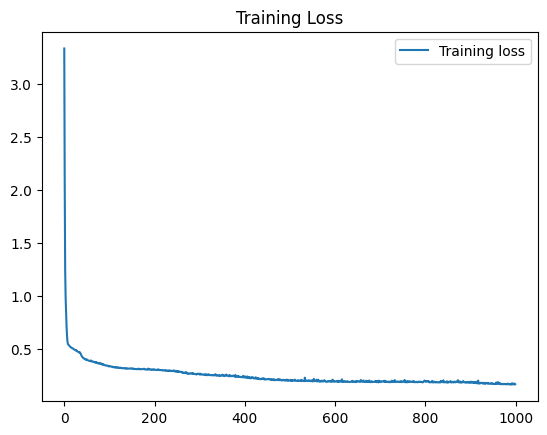

In [18]:
plt.plot(history.history['loss'], label='Training loss')
plt.title('Training Loss')
plt.legend()
plt.show()

## Problem 3
Try increasing the number of hidden nodes per layer until performance is satisfactory. Can the same effect be achieved by just adding more layers?

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 64)                128       
                                                                 
 dense_43 (Dense)            (None, 64)                4160      
                                                                 
 dense_44 (Dense)            (None, 64)                4160      
                                                                 
 dense_45 (Dense)            (None, 64)                4160      
                                                                 
 dense_46 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12673 (49.50 KB)
Trainable params: 12673 (49.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
40/40

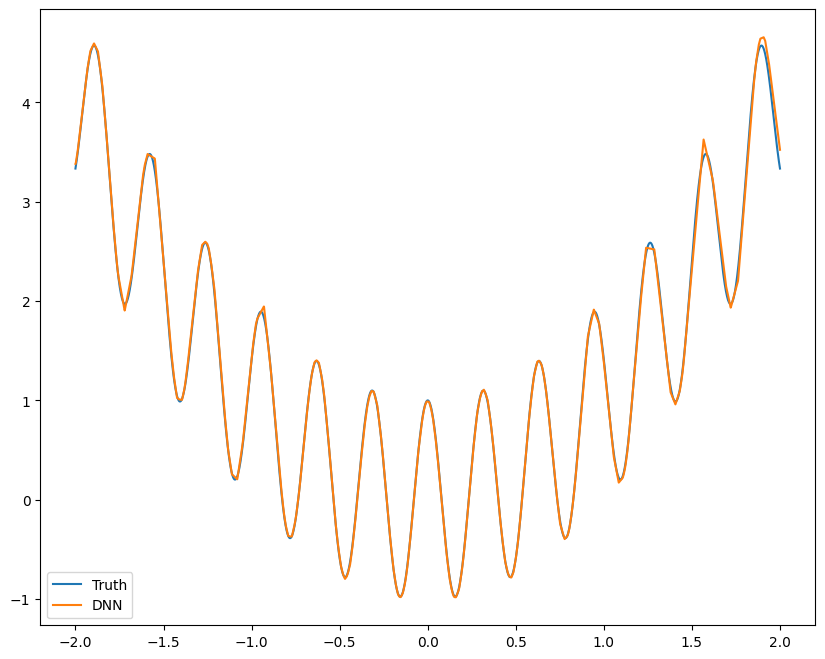

In [26]:
# Create a model with multiple hidden layers. Note that input and output has
# dimension one
M = 16 * 4
model = keras.Sequential([
    keras.layers.Dense(M, activation=tf.nn.relu, input_dim=1),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(1)
])
model.summary()

# Train the model
model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(x, f(x), epochs=1000, batch_size=128, verbose=True)

z = model.predict(x)
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
plt.plot(x,z,label="DNN")
plt.legend()
plt.show()

We maybe have over-fitting here because of the size of the neural-network.

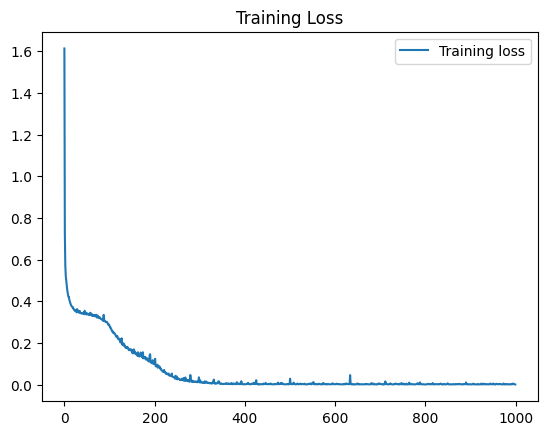

In [27]:
plt.plot(history.history['loss'], label='Training loss')
plt.title('Training Loss')
plt.legend()
plt.show()

## Problem 4
Using the best setup from the previous problem, train a model using the noisy data.

In [24]:
# Create a model with multiple hidden layers. Note that input and output has
# dimension one
M = 16 * 16 
model = keras.Sequential([
    keras.layers.Dense(M, activation=tf.nn.relu, input_dim=1),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(1)
])
model.summary()

# Train the model
model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(x, y, epochs=1000, batch_size=128, verbose=True)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 256)               512       
                                                                 
 dense_29 (Dense)            (None, 256)               65792     
                                                                 
 dense_30 (Dense)            (None, 256)               65792     
                                                                 
 dense_31 (Dense)            (None, 256)               65792     
                                                                 
 dense_32 (Dense)            (None, 256)               65792     
                                                                 
 dense_33 (Dense)            (None, 256)               65792     
                                                                 
 dense_34 (Dense)            (None, 256)              

157/157 [==============================] - 0s 958us/step


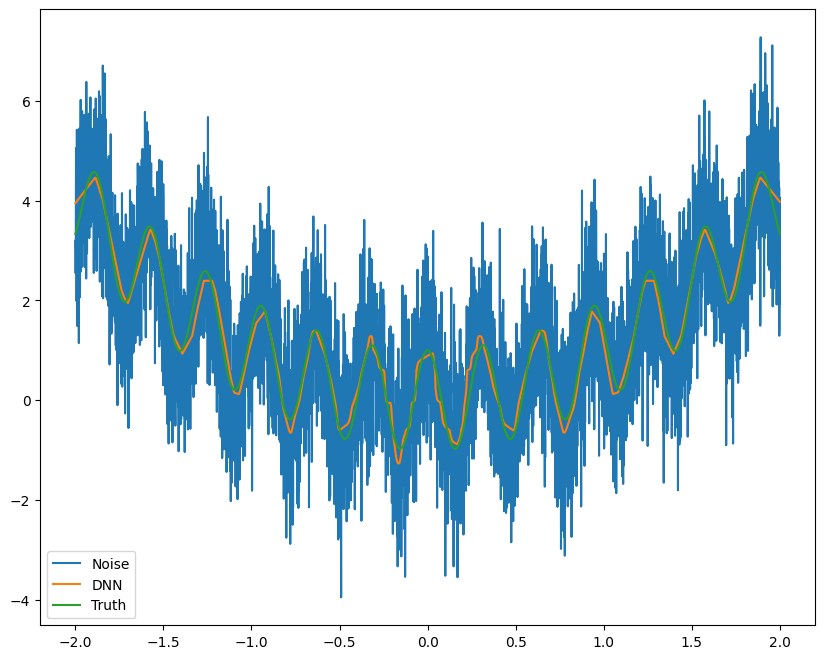

In [25]:
z = model.predict(x)
plt.figure(figsize=(10,8))
plt.plot(x,y,label="Noise")
plt.plot(x,z,label="DNN")
plt.plot(x,f(x),label="Truth")
plt.legend()
plt.show()

Even with the noise, our model match well the real curve.

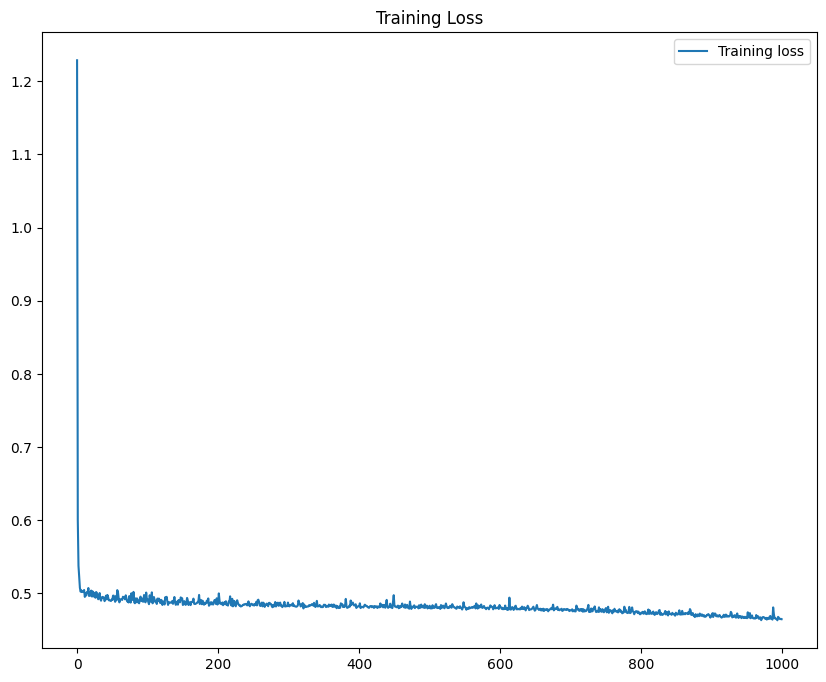

In [36]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label='Training loss')
plt.title('Training Loss')
plt.legend()
plt.show()